In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def RSS(r, X):
    return ((r - X) ** 2).sum()


# generate demo data
X_df = pd.Series(np.random.randint(0, 10, 40))
y_df = 5 * X_df + 5

# convert to numpy arrays
X = X_df.to_numpy()
y = y_df.to_numpy()

# sort data based on X
sort_index = np.argsort(X)
X = X[sort_index]
y = y[sort_index]

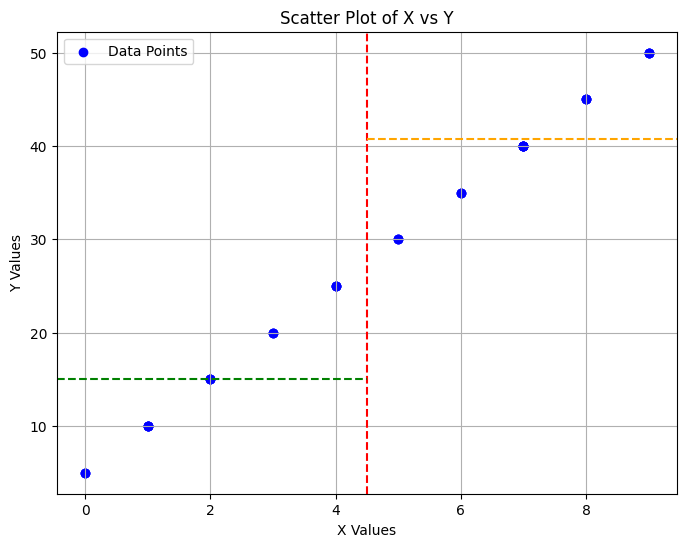

In [137]:
# concept rss
c_threshold = 4.5

c_low = np.take(y, np.where(X < c_threshold))
c_high = np.take(y, np.where(X >= c_threshold))

c_pred_low = c_low.mean()
c_pred_high = c_high.mean()

c_rss = RSS(c_pred_low, c_low) + RSS(c_pred_high, c_high)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.axvline(c_threshold, color='red', linestyle='--')
plt.axhline(c_pred_low, xmin=0, xmax=c_threshold / max(X), color='green', linestyle='--')
plt.axhline(c_pred_high, xmin=c_threshold / max(X), xmax=max(X), color='orange', linestyle='--')

# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X vs Y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [138]:
# concept rss
def calculate_rss(X_data, y_data, threshold):
    # get y values where x < threshold
    low = np.take(y_data, np.where(X_data < threshold))
    # get y values where x >= threshold
    high = np.take(y_data, np.where(X_data >= threshold))

    pred_low = low.mean() if len(low[0]) > 0 else 0
    pred_high = high.mean() if len(high[0]) > 0 else 0

    return RSS(pred_low, low) + RSS(pred_high, high)

In [139]:
def find_best_split(X_data, y_data):
    # Generate pairs of adjacent elements
    best_split = None
    min_rss = float('inf')  # Initialize the minimum RSS with a very large number

    for i in range(len(X_data) - 1):
        threshold = X_data[i:i + 2].mean()  # Calculate the threshold as the mean of x1 and x2
        print(f"Calculating RSS with threshold: {threshold}")

        rss = calculate_rss(X_data, y_data, threshold)  # Calculate RSS for the threshold

        # If this RSS is smaller than the current minimum, update the best_split
        if rss < min_rss:
            min_rss = rss
            best_split = (threshold, rss)

    # Print the best split with the minimum RSS
    print(f"Best split found at threshold: {best_split[0]} with RSS: {best_split[1]}")


find_best_split(X, y)

Calculating RSS with threshold: 0.0
0
Calculating RSS with threshold: 0.0
0
Calculating RSS with threshold: 0.5
3
Calculating RSS with threshold: 1.0
3
Calculating RSS with threshold: 1.0
3
Calculating RSS with threshold: 1.0
3
Calculating RSS with threshold: 1.0
3
Calculating RSS with threshold: 1.5
8
Calculating RSS with threshold: 2.0
8
Calculating RSS with threshold: 2.0
8
Calculating RSS with threshold: 2.0
8
Calculating RSS with threshold: 2.5
12
Calculating RSS with threshold: 3.0
12
Calculating RSS with threshold: 3.0
12
Calculating RSS with threshold: 3.5
15
Calculating RSS with threshold: 4.0
15
Calculating RSS with threshold: 4.0
15
Calculating RSS with threshold: 4.0
15
Calculating RSS with threshold: 4.5
19
Calculating RSS with threshold: 5.0
19
Calculating RSS with threshold: 5.0
19
Calculating RSS with threshold: 5.5
22
Calculating RSS with threshold: 6.0
22
Calculating RSS with threshold: 6.0
22
Calculating RSS with threshold: 6.5
25
Calculating RSS with threshold: 7.0
